<a href="https://colab.research.google.com/github/add54/-Data-Analysis-plotly-Plotly-Whirlwind-Introduction.ipynb-/blob/master/Heart_disease_csv_Analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd 
import seaborn as sns
import numpy as np
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/cardio.csv',sep=';')
df.head()
#df.shape

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


1. Count the empty vales in each colum

In [14]:
df.isna().sum()
#df.isnull().values.any()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

2.View some basic statistics 


In [15]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


3. Get a acount of the number of patient with acardiovascular disease and without and Visualise it:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


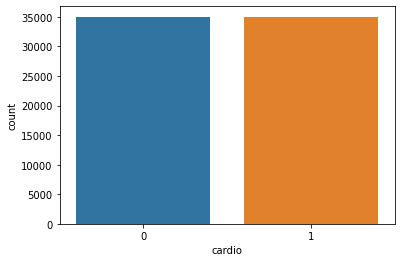

In [19]:
df['cardio'].value_counts()
sns.countplot(df['cardio'])

4.Look at the number of people with cardio disease that exceed the number of people whithout:

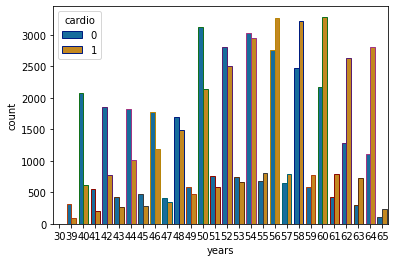

In [27]:
#Create a year column
df['years'] = (df['age'] / 365).round(0)
df['years'] = pd.to_numeric(df['years'], downcast='integer')
df.head(2)
#Visualise the data:
sns.countplot(x='years', hue='cardio', data=df, palette='colorblind', edgecolor=sns.color_palette('dark'))

5. Get the correlation of the columns

In [29]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884,-0.047884


6. Visualize the data

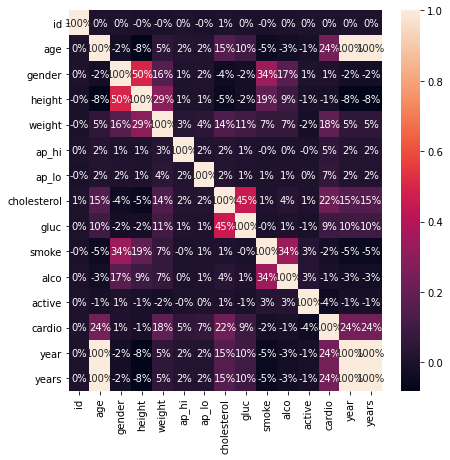

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

7. Remove or drop the years column

In [31]:
df = df.drop('years', axis=1)

In [32]:
df = df.drop('id', axis=1)

8. Split the data into feature data and taget data:

In [35]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
X,Y

(array([[1.8393e+04, 2.0000e+00, 1.6800e+02, ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [2.0228e+04, 1.0000e+00, 1.5600e+02, ..., 0.0000e+00, 1.0000e+00,
         1.0000e+00],
        [1.8857e+04, 1.0000e+00, 1.6500e+02, ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        ...,
        [1.9066e+04, 2.0000e+00, 1.8300e+02, ..., 1.0000e+00, 0.0000e+00,
         1.0000e+00],
        [2.2431e+04, 1.0000e+00, 1.6300e+02, ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        [2.0540e+04, 1.0000e+00, 1.7000e+02, ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00]]), array([50., 55., 52., ..., 52., 61., 56.]))

9. Split the data again , into 75% training data and 25% testing data set:

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state=1)

10. Feature Scaling ,sclaing data to be between 0 and 1 inclusive

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



11. Use Random Forest Classifier


In [41]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion ='entropy', random_state = 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

12. Test the models accuracy on the traing data set

In [42]:
model = forest
model.score(X_train, Y_train)

0.9993714285714286

13. Test the model accuracy on the data set

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

#PRINT CONFUSION MATRIX
print(cm)
#PRINT THE MODEL ACCURACY ON THE TEST DATA
print('Model Test Accuracy = {}'.format((TP + TN) / (TP + TN + FN + FP)))


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   63   28    1    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1   28  618    7   10    3    3    0    0    0    0    1    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    3   47  119   16    0    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0   13   39  589    2    2    0    0    1    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    1    2   43  121   18    0    2    1    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    4    0    9   40  654    1    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0  